## Visual analysis of synthetic data

In [1]:
# Necessary imports
import numpy as np
import pandas as pd
from data_loading import df_from_file, list_from_file, synt_data_from_file
import json
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})


2024-06-02 16:30:59.558020: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-02 16:31:00.082353: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-02 16:31:00.085169: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-02 16:31:03.791117: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Instructions for updating:
non-resource variables are not supported in the long term


#### Importing data from csv-file to a dataframe

In [3]:
ori_data_file = 'sensor_data_norm2_indexless_10days.csv'
ori_data = df_from_file(ori_data_file)
# ori_data.plot()

# synt_data_file = 'gen_data_norm05_03_24__14h34_indexless.csv'
# synt_data = synt_data_from_file(synt_data_file)
# synt_data.plot()



#### Generating random data to use as control samples

In [14]:
rand_data = pd.DataFrame(np.random.normal(0, 0.1, ori_data.shape))
rand_data.shape

(28800, 9)

#### PCA

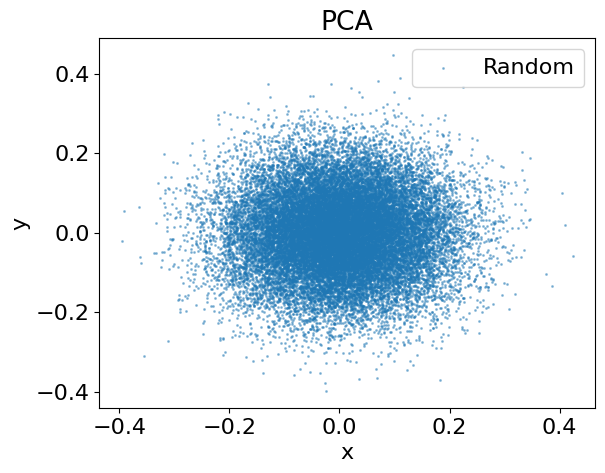

In [18]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)

pca_ori_data = pca.fit_transform(rand_data)
# pca_synt_data = pca.fit_transform(synt_data)
# pca_rand_data = .fit_transform(rand_data)

# pca_ori_data = preprocessing.normalize(pca_ori_data, axis=0)
# pca_synt_data = preprocessing.normalize(pca_synt_data, axis=0)


# print(type(pca_ori_data))
pca_ori_df = pd.DataFrame(data = pca_ori_data, columns = ['x', 'y'])
# pca_synt_df = pd.DataFrame(data = pca_synt_data, columns = ['x', 'y'])
# pca_rand_df = pd.DataFrame(data = pca_rand_data, columns = ['x', 'y'])


# Plotting
marker = "."
size = 5
f, ax = plt.subplots(1)    
# plt.scatter(pca_rand_df['x'], pca_rand_df['y'], alpha = 0.2, label = "Random", marker=marker, s=size)
plt.scatter(pca_ori_df['x'],pca_ori_df['y'], alpha = 0.4, label = "Random", marker=marker, s=size)
# plt.scatter(pca_synt_df['x'], pca_synt_df['y'], alpha = 0.2, label = "Synthetic", marker=marker, s=size)

ax.legend()  
plt.title('PCA')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


#### T-SNE

In [16]:
from sklearn.manifold import TSNE
import time

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_ori_data = tsne.fit_transform(rand_data)
# tsne_synt_data = tsne.fit_transform(synt_data)
# tsne_rand_data = tsne.fit_transform(rand_data)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

tsne_ori_df = pd.DataFrame(data = tsne_ori_data, columns = ['x', 'y'])
# tsne_synt_df = pd.DataFrame(data = tsne_synt_data, columns = ['x', 'y'])
# tsne_rand_df = pd.DataFrame(data = tsne_rand_data, columns = ['x', 'y'])


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 28800 samples in 0.091s...
[t-SNE] Computed neighbors for 28800 samples in 16.387s...
[t-SNE] Computed conditional probabilities for sample 1000 / 28800
[t-SNE] Computed conditional probabilities for sample 2000 / 28800
[t-SNE] Computed conditional probabilities for sample 3000 / 28800
[t-SNE] Computed conditional probabilities for sample 4000 / 28800
[t-SNE] Computed conditional probabilities for sample 5000 / 28800
[t-SNE] Computed conditional probabilities for sample 6000 / 28800
[t-SNE] Computed conditional probabilities for sample 7000 / 28800
[t-SNE] Computed conditional probabilities for sample 8000 / 28800
[t-SNE] Computed conditional probabilities for sample 9000 / 28800
[t-SNE] Computed conditional probabilities for sample 10000 / 28800
[t-SNE] Computed conditional probabilities for sample 11000 / 28800
[t-SNE] Computed conditional probabilities for sample 12000 / 28800
[t-SNE] Computed conditional probabilities for s

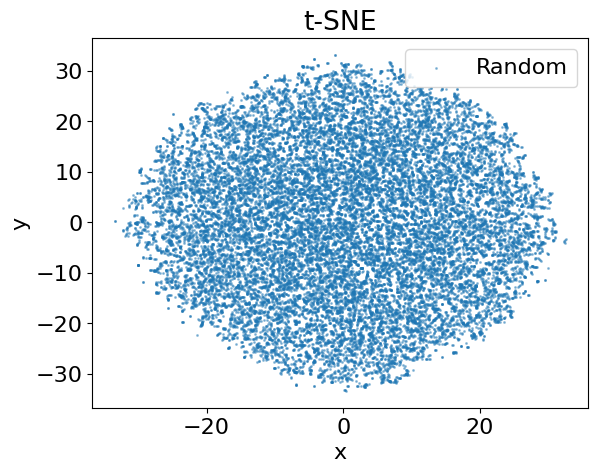

In [17]:
# Plotting
plt.rcParams.update({'font.size': 16})
marker = "."
size = 5
f, ax = plt.subplots(1)    
# plt.scatter(tsne_rand_df['x'], tsne_rand_df['y'], alpha = 0.2, label = "Random", marker=marker, s=size)
# plt.scatter(tsne_synt_df['x'], tsne_synt_df['y'], alpha = 0.2, label = "Synthetic", marker=marker, s=size)
plt.scatter(tsne_ori_df['x'],tsne_ori_df['y'], alpha = 0.4, label = "Random", marker=marker, s=size)

ax.legend()  
plt.title('t-SNE')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Visual analysis of the generated industrial data

In [4]:
filename = 'synt_data/exp3/gen_sensor_24_26_05_24__18h54.json'
with open(filename, 'r') as file: #Need to change date and time for each sample
    y_np = np.array(json.load(file))
y_flat = np.reshape(y_np, (y_np.shape[0]*y_np.shape[1], y_np.shape[2]))
# y_flat_half = y_flat[:int(len(y_flat)/2)]
y = pd.DataFrame(y_flat)
y_smaller = y.sample(ori_data.shape[0])
y_smaller.shape

(28800, 9)

In [11]:
lstm_long_df = pd.DataFrame(np.loadtxt(f'synt_data/exp3/lstm_sensor_100_260524_19h21.csv', delimiter=',', skiprows=1))

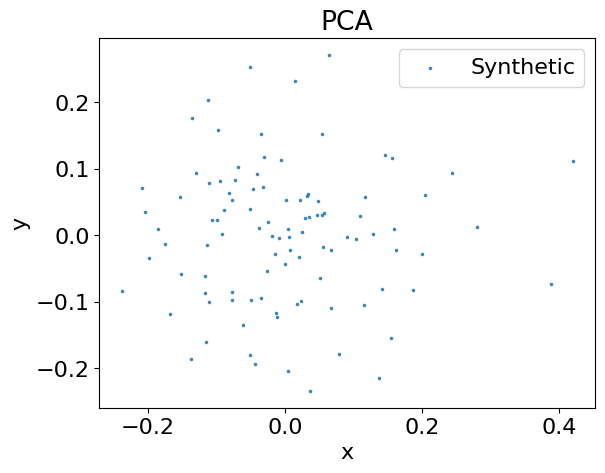

In [13]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)

pca_ori_data = pca.fit_transform(lstm_long_df)

pca_ori_df = pd.DataFrame(data = pca_ori_data, columns = ['x', 'y'])


# Plotting
marker = "."
size = 10
f, ax = plt.subplots(1)    
# plt.scatter(pca_rand_df['x'], pca_rand_df['y'], alpha = 0.2, label = "Random", marker=marker, s=size)
plt.scatter(pca_ori_df['x'],pca_ori_df['y'], alpha = 0.8, label = "Synthetic", marker=marker, s=size)
# plt.scatter(pca_synt_df['x'], pca_synt_df['y'], alpha = 0.2, label = "Synthetic", marker=marker, s=size)

ax.legend()  
plt.title('PCA')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
from sklearn.manifold import TSNE
import time

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_ori_data = tsne.fit_transform(y_smaller)
# tsne_synt_data = tsne.fit_transform(synt_data)
# tsne_rand_data = tsne.fit_transform(rand_data)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

tsne_ori_df = pd.DataFrame(data = tsne_ori_data, columns = ['x', 'y'])
# tsne_synt_df = pd.DataFrame(data = tsne_synt_data, columns = ['x', 'y'])
# tsne_rand_df = pd.DataFrame(data = tsne_rand_data, columns = ['x', 'y'])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 28800 samples in 0.048s...
[t-SNE] Computed neighbors for 28800 samples in 5.223s...
[t-SNE] Computed conditional probabilities for sample 1000 / 28800
[t-SNE] Computed conditional probabilities for sample 2000 / 28800
[t-SNE] Computed conditional probabilities for sample 3000 / 28800
[t-SNE] Computed conditional probabilities for sample 4000 / 28800
[t-SNE] Computed conditional probabilities for sample 5000 / 28800
[t-SNE] Computed conditional probabilities for sample 6000 / 28800
[t-SNE] Computed conditional probabilities for sample 7000 / 28800
[t-SNE] Computed conditional probabilities for sample 8000 / 28800
[t-SNE] Computed conditional probabilities for sample 9000 / 28800
[t-SNE] Computed conditional probabilities for sample 10000 / 28800
[t-SNE] Computed conditional probabilities for sample 11000 / 28800
[t-SNE] Computed conditional probabilities for sample 12000 / 28800
[t-SNE] Computed conditional probabilities for sa

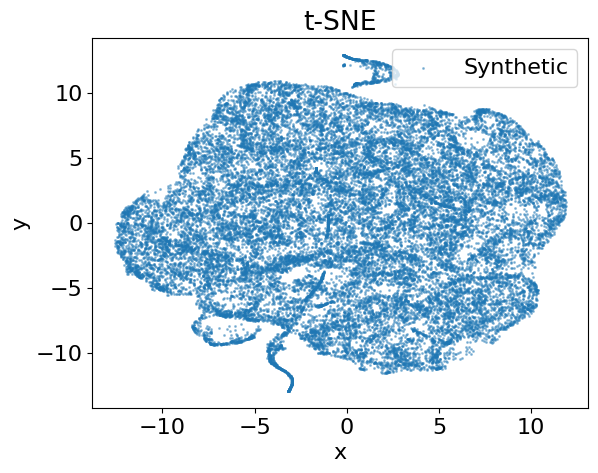

In [7]:
# Plotting
plt.rcParams.update({'font.size': 16})
marker = "."
size = 5
f, ax = plt.subplots(1)    
# plt.scatter(tsne_rand_df['x'], tsne_rand_df['y'], alpha = 0.2, label = "Random", marker=marker, s=size)
# plt.scatter(tsne_synt_df['x'], tsne_synt_df['y'], alpha = 0.2, label = "Synthetic", marker=marker, s=size)
plt.scatter(tsne_ori_df['x'],tsne_ori_df['y'], alpha = 0.4, label = "Synthetic", marker=marker, s=size)

ax.legend()  
plt.title('t-SNE')
plt.xlabel('x')
plt.ylabel('y')
plt.show()